In [1]:
import pandas as pd

# Load the datasets to inspect their contents
budget_data = pd.read_csv(r'Datasets\Budget.csv')
transactions_data = pd.read_csv(r'Datasets\personal_transactions.csv')

# Display the first few rows of each dataset to understand their structure
budget_data_head = budget_data.head()
transactions_data_head = transactions_data.head()

budget_data_head, transactions_data_head

(                 Category  Budget
 0          Alcohol & Bars      50
 1          Auto Insurance      75
 2            Coffee Shops      15
 3  Electronics & Software       0
 4           Entertainment      25,
          Date          Description   Amount Transaction Type  \
 0  01/01/2018               Amazon    11.11            debit   
 1  01/02/2018     Mortgage Payment  1247.44            debit   
 2  01/02/2018      Thai Restaurant    24.22            debit   
 3  01/03/2018  Credit Card Payment  2298.09           credit   
 4  01/04/2018              Netflix    11.76            debit   
 
               Category   Account Name  
 0             Shopping  Platinum Card  
 1      Mortgage & Rent       Checking  
 2          Restaurants    Silver Card  
 3  Credit Card Payment  Platinum Card  
 4        Movies & DVDs  Platinum Card  )

In [2]:
# Convert the Date column to datetime format
transactions_data['Date'] = pd.to_datetime(transactions_data['Date'], format='%m/%d/%Y')

# Separate and aggregate debit and credit transactions by date
expenses = transactions_data[transactions_data['Transaction Type'] == 'debit']
income = transactions_data[transactions_data['Transaction Type'] == 'credit']

# Aggregate by date
daily_expenses = expenses.groupby('Date')['Amount'].sum().reset_index()
daily_income = income.groupby('Date')['Amount'].sum().reset_index()

# Rename columns for use with Prophet ('ds' for date, 'y' for the value)
daily_expenses.columns = ['ds', 'y']
daily_income.columns = ['ds', 'y']

# Display the first few rows of the processed data
daily_expenses.head(), daily_income.head()

(          ds        y
 0 2018-01-01    11.11
 1 2018-01-02  1271.66
 2 2018-01-04    11.76
 3 2018-01-05    25.85
 4 2018-01-06    18.45,
           ds        y
 0 2018-01-03  2298.09
 1 2018-01-12  2000.00
 2 2018-01-19  2000.00
 3 2018-01-22   864.80
 4 2018-02-02  2000.00)

12:26:39 - cmdstanpy - INFO - Chain [1] start processing
12:26:39 - cmdstanpy - INFO - Chain [1] done processing
12:26:39 - cmdstanpy - INFO - Chain [1] start processing
12:26:39 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x600 with 0 Axes>

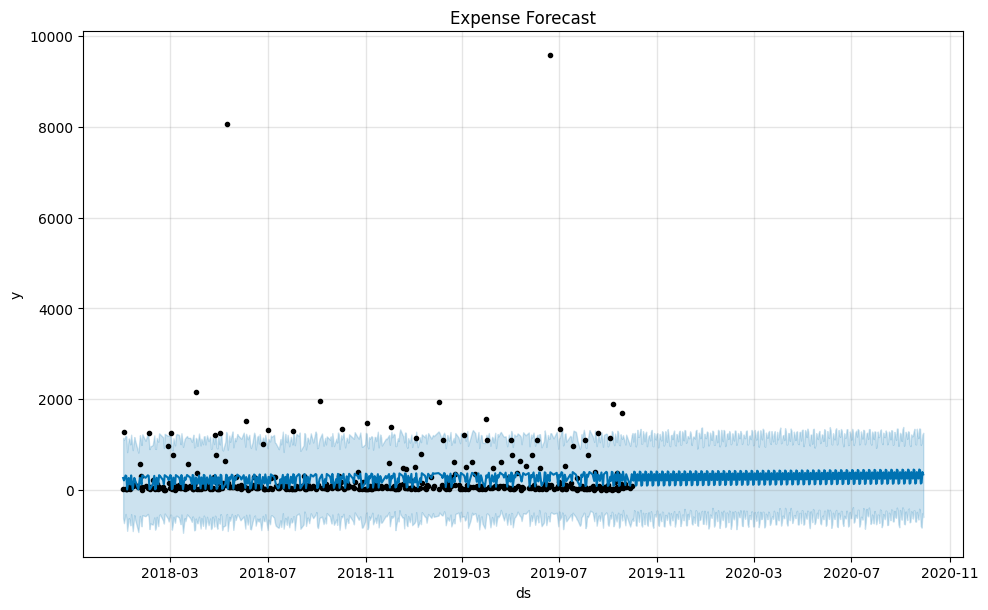

<Figure size 1200x600 with 0 Axes>

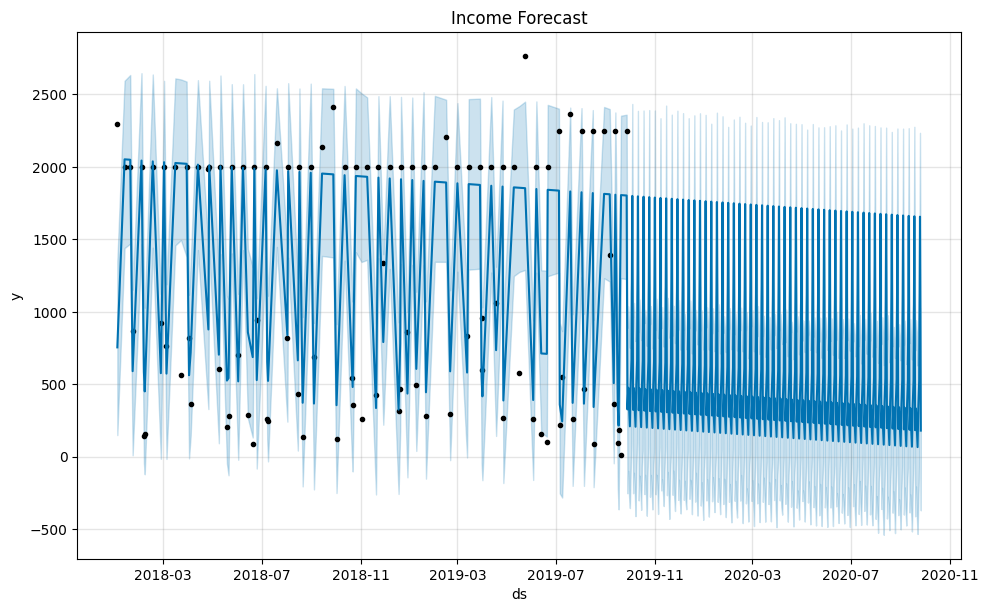

In [4]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize Prophet models
expense_model = Prophet()
income_model = Prophet()

# Fit the models on the respective datasets
expense_model.fit(daily_expenses)
income_model.fit(daily_income)

# Generate future dates for prediction (1 year into the future)
future_expenses = expense_model.make_future_dataframe(periods=365)
future_income = income_model.make_future_dataframe(periods=365)

# Predict future values
expense_forecast = expense_model.predict(future_expenses)
income_forecast = income_model.predict(future_income)

# Plot the forecasts
plt.figure(figsize=(12, 6))
expense_model.plot(expense_forecast)
plt.title("Expense Forecast")
plt.show()

plt.figure(figsize=(12, 6))
income_model.plot(income_forecast)
plt.title("Income Forecast")
plt.show()